<a href="https://colab.research.google.com/github/DiegoLLP123/upsrj-machine-learning/blob/main/WineDatasetDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Carga de la base de datos
data = load_wine()
print(data.keys())

# Variables
X = data.data
y = data.target
feature_names = data.feature_names

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [4]:
# Convertir problema a binario
y_binary = np.where(y == 0, 0, 1)

target_names = ["Clase 0", "Clase 1 y 2"]

In [5]:
# división de datos
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_binary,
    test_size=0.3,        # 30% prueba → 70% entrenamiento
    random_state=42,
    stratify=y_binary
)

In [6]:
# Creación del modelo
model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
# Predicción
y_pred = model.predict(X_test)

In [9]:
# Evaluación del modelo
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy:
0.8703703703703703

Confusion Matrix:
[[15  3]
 [ 4 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.91      0.89      0.90        36

    accuracy                           0.87        54
   macro avg       0.85      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54



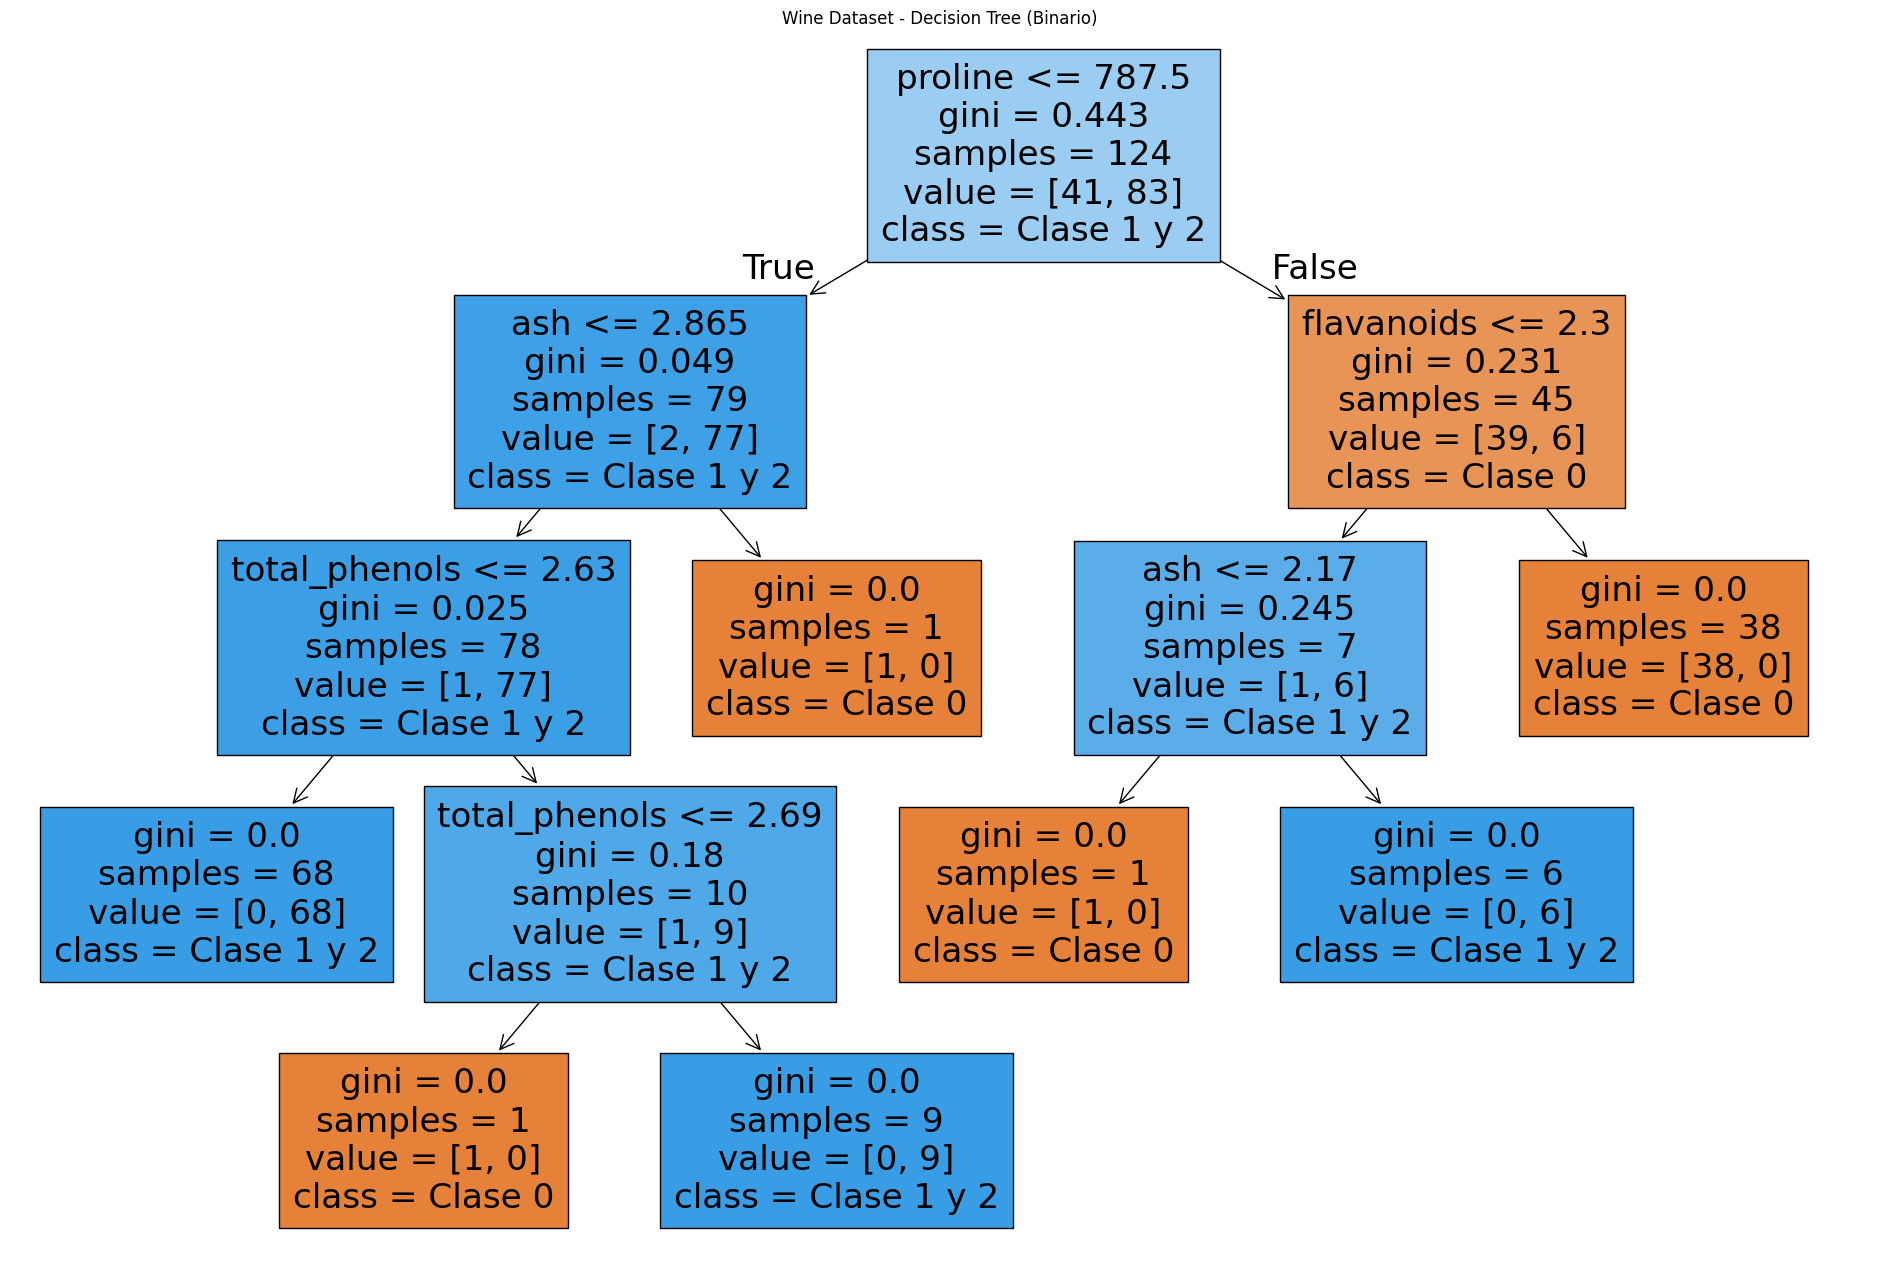

In [10]:
# Visualización del modelo
plt.figure(figsize=(24,16))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=target_names,
    filled=True
)
plt.title("Wine Dataset - Decision Tree (Binario)")
plt.show()